In [65]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
#Importing the packages, and some sample codes to show they are running properly. 
a = np.arange(15).reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [61]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

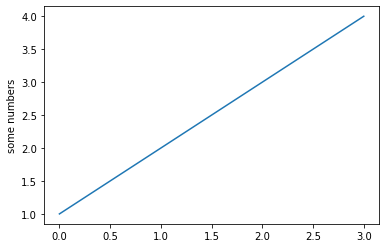

In [66]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

In [69]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
data = pd.read_csv(r"C:\Users\giant\Downloads\housing.csv")
data.head()
#This data details information on selected California homes in 1990.
#Each record is a "cluster", as defined by the Census Bureau,
#and consists of a neighborhood of homes and some various features of them. 
#Here we have all our input variables. Latitide and Longitude are geographical coordinates,
#the total rooms/bedrooms are features of all houses in that cluster, 
#ocean proximity is a category defining how close to the Pacific that neighborhood is, while
#population and median age/income/value are all statistics of that cluster.
#We aim to predict the value of the house, given the parameters. 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [86]:
data=data.dropna()
data.shape
#Our dataset is large, so we can afford to drop all records with missing values

(20433, 10)

In [73]:
data.describe()
#Standard summary statistics of each variable in our dataset.
#Ocean proximity is omitted due to it being categorical.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E054813AC8>,
      dtype=object)

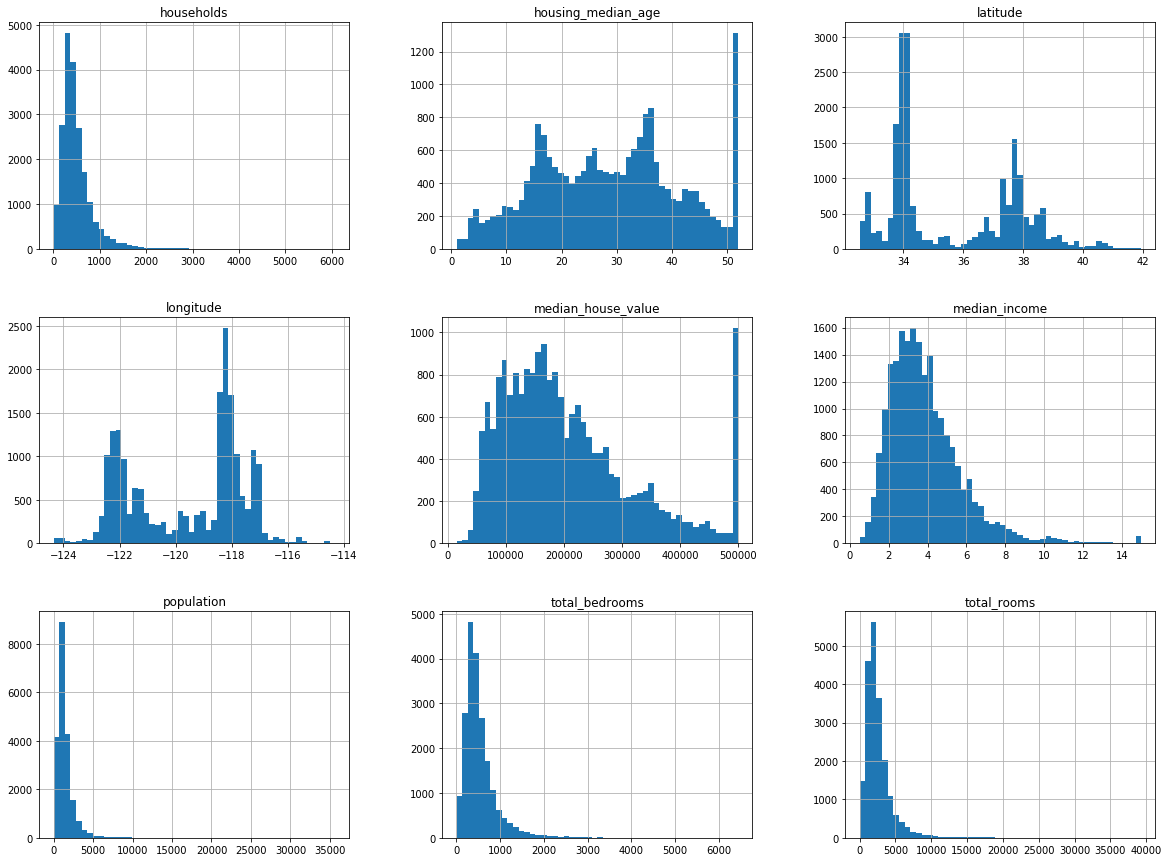

In [5]:
data.hist(bins=50, figsize=(20,15))
#Histograms of each of the nine variables of interest. 
#Of special note is our target, the median house value. It appears the max value to be counted
#has been set at 50,000. This will need to be accounted for in our analysis. 
#Many variables appear to be heavily skewed right

In [6]:
data['median_house_value'].value_counts()
#Value counts for our target variable. Note ~4% of the data is beyond this clipped maximum

500001.0    958
137500.0    119
162500.0    116
112500.0    103
187500.0     92
           ... 
420500.0      1
419000.0      1
443000.0      1
343600.0      1
319500.0      1
Name: median_house_value, Length: 3833, dtype: int64

In [7]:
data['ocean_proximity'].value_counts()
#Value counts for the categorical variable

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [96]:
Xtrain=data.drop(['median_house_value','ocean_proximity'],axis=1)
ytrain=data['median_house_value']
#Setting our regressor and regressand matricies. 
#We will attempt to predict the median house value by using the numerical variables,
#and will use linear regression to accomplish this. 

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import statsmodels.api as sm
X = sm.add_constant(Xtrain)
results = sm.OLS(ytrain,X).fit()
results.summary()  

#Summary of our Linear regression output. Our full mathematical model, with rounded constants, is:
#Median_House_Value=-3,596,000-42,810*Longitude-42,810*Latitude+1162*Median_Age
#-9*Total_Rooms+109*Total_Bedrooms-37*Population+53*Households+40,530*Median_Income
#We have an R^2 of .637, an F of 4478, and all t have p-values very small.
#These indicate our model is a good fit for the data, and has strong predictive power

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     4478.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:58:55   Log-Likelihood:            -2.5682e+05
No. Observations:               20433   AIC:                         5.137e+05
Df Residuals:                   20424   BIC:                         5.137e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.585e+06   6.29e+04    -57.001      0.000   -3.71e+06   -3.46e+06
longitude          -4.273e+04    717.087    -59.588      0.000   -4.41e+04   -4.13e+04
latitude           -4.251e+04    676.952    -62.796      0.000   -4.38e+04   -4.12e+04
housing_median_age  1157.9003     43.389     26.687      0.000    1072.855    1242.945
total_rooms           -8.2497      0.794    -10.387      0.000      -9.807      -6.693
total_bedrooms       113.8207      6.931     16.423      0.000     100.236     127.405
population           -38.3856      1.084    -35.407      0.000     -40.511     -36.261
households            47.7014      7.547      6.321      0.000      32.909      62.493
median_income        4.03e+04    337.207    119.504      0.000    3.96e+04     4.1e+04
==============================================================================
Omnibus:                     4898.534   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18260.733
Skew:                           1.166   Prob(JB):                         0.00
Kurtosis:                       7.002   Cond. No.                     5.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

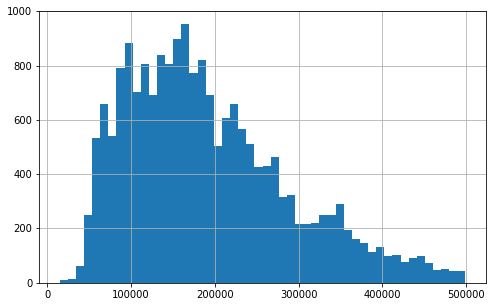

In [108]:
data2=data[data['median_house_value']<500000]
data2['median_house_value'].hist(bins=50,figsize=(8,5))
#If we run the model again, but try omitting the cutoff values,
#the plot below does show a more realistic distribution.
#But, in the next cell we see the model actually does appear to lose some predicitve power.

In [109]:
Xtrain2=data2.drop(['median_house_value','ocean_proximity'],axis=1)
ytrain2=data2['median_house_value']
X2 = sm.add_constant(Xtrain2)
results2 = sm.OLS(ytrain2,X2).fit()
results2.summary() 
#The slightly lower  and lower R^2 suggest we might be better off
#leaving the cutoff values in the data. To understand why, 
#we must step back and remember what we are analyzing.
#The cutoff values represent the top 4% of neighboorhoods in California. 
#The most valuable neighborhoods probably also have more rooms,
#more income, fewer houses and a smaller population. This is also 
#reflected in the similar shapes of the variable graphs from before.
#Therefore, we can conclude that the first model, with all the data,
#is the best predictive model for estimating the median house value of a given cluster. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     3699.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        03:07:31   Log-Likelihood:            -2.4193e+05
No. Observations:               19448   AIC:                         4.839e+05
Df Residuals:                   19439   BIC:                         4.839e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.313e+06   5.65e+04    -58.609      0.000   -3.42e+06    -3.2e+06
longitude           -3.93e+04    645.127    -60.918      0.000   -4.06e+04    -3.8e+04
latitude           -3.862e+04    607.614    -63.560      0.000   -3.98e+04   -3.74e+04
housing_median_age   999.2492     39.986     24.990      0.000     920.873    1077.625
total_rooms           -9.4802      0.742    -12.779      0.000     -10.934      -8.026
total_bedrooms       104.7093      6.279     16.676      0.000      92.402     117.017
population           -30.1824      0.973    -31.030      0.000     -32.089     -28.276
households            40.9754      6.713      6.103      0.000      27.816      54.134
median_income       3.979e+04    374.478    106.250      0.000    3.91e+04    4.05e+04
==============================================================================
Omnibus:                     3675.516   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11613.626
Skew:                           0.968   Prob(JB):                         0.00
Kurtosis:                       6.253   Cond. No.                     5.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""